Setup complete.
🎯 WELCOME TO THE ENHANCED MACHINE LEARNING WORKBENCH!
Now featuring proper target encoding and churn prediction analysis! 🎯
This tool provides:
  • Automated CSV file upload and analysis
  • Automatic categorical feature encoding
  • Proper target variable encoding (boolean, categorical, numeric)
  • Class imbalance handling
  • Boston Housing dataset specialization
  • Churn prediction dataset specialization
  • Space-separated data handling
  • Multiple machine learning model training
  • Performance comparison and visualization
🚀 ENHANCED MACHINE LEARNING PIPELINE - FIXED VERSION
Now with proper target encoding and detailed classification reports! 📊
------------------------------------------------------------
Would you like to upload CSV files? (y/n): y
🤖 ENHANCED MACHINE LEARNING WORKBENCH - FIXED VERSION
This application now includes:
  • Proper target variable encoding (boolean, categorical, numeric)
  • Robust error handling for categorical data and class imbalan

Saving 1) iris.csv to 1) iris (1).csv
✅ Successfully uploaded: 1) iris (1).csv (Shape: (150, 5))

📁 Total uploaded files: 1

2️⃣ STEP 2: DATA PROCESSING
----------------------------------------

PROCESSING UPLOADED FILES

📊 Analyzing: 1) iris (1).csv
   Shape: (150, 5)
   Columns: 5

   Data Types:
float64    4
object     1
Name: count, dtype: int64

   ✅ No missing values

   🔢 Numeric Columns (4):
      ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

   📝 Categorical Columns (1):
      ['species']
         species: 3 unique values
            Values: ['setosa', 'versicolor', 'virginica']

   ⚙️  Preprocessing: 1) iris (1).csv
      Imputed numeric columns: 4
      Imputed categorical columns: 1

   🎯 Detecting target column for 1) iris (1).csv...
   Potential target columns: ['species']
      Task type: classification
      Target column: species
      Encoding target variable 'species'...
         Encoded categorical target using LabelEncoder
         Classes: ['seto

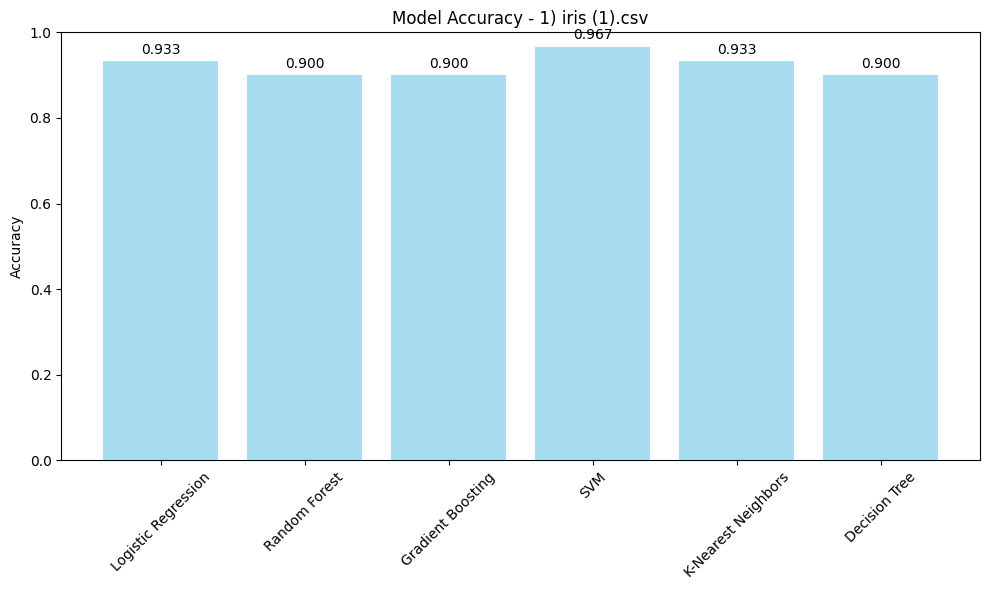

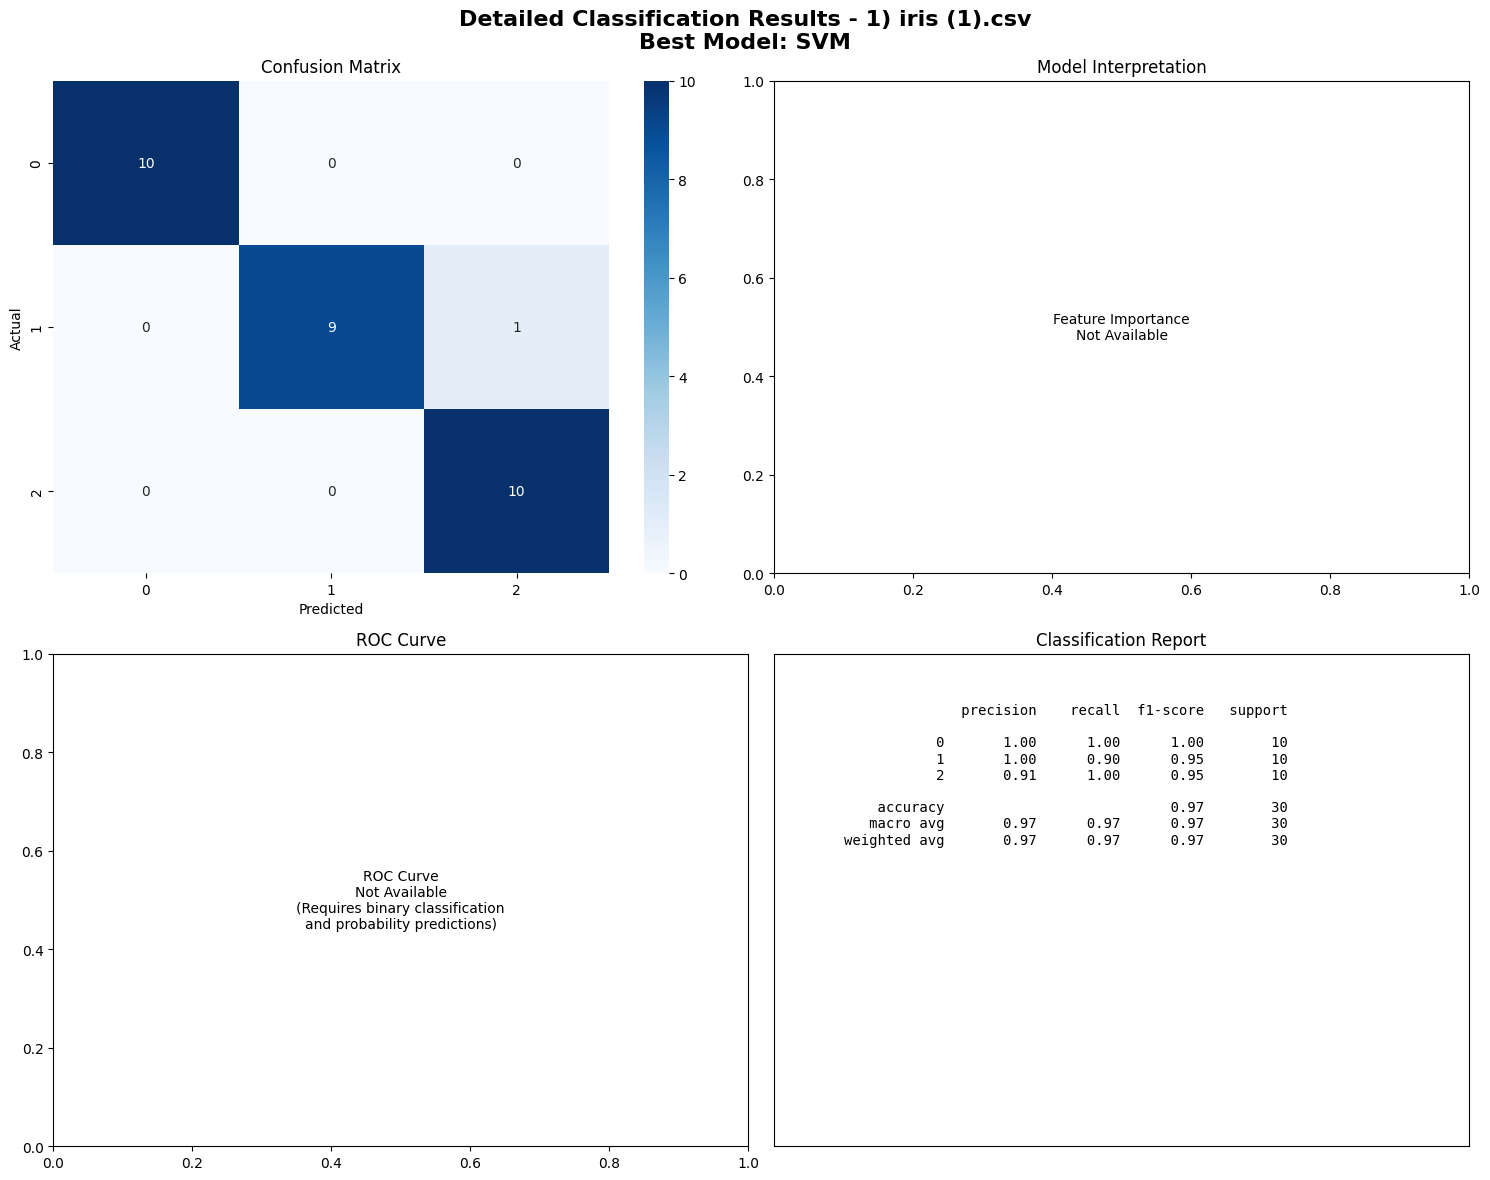


📊 Results for 1) iris (1).csv:
                     accuracy  precision  recall  f1_score  auc_roc  \
Logistic Regression    0.9333     0.9333  0.9333    0.9333   0.9967   
Random Forest          0.9000     0.9024  0.9000    0.8997   0.9867   
Gradient Boosting      0.9000     0.9024  0.9000    0.8997   0.9833   
SVM                    0.9667     0.9697  0.9667    0.9666   0.9967   
K-Nearest Neighbors    0.9333     0.9444  0.9333    0.9327   0.9933   
Decision Tree          0.9000     0.9024  0.9000    0.8997   0.9250   

                     CV Accuracy Mean  CV Accuracy Std  
Logistic Regression            0.9583           0.0264  
Random Forest                  0.9500           0.0167  
Gradient Boosting              0.9667           0.0167  
SVM                            0.9667           0.0312  
K-Nearest Neighbors            0.9667           0.0312  
Decision Tree                  0.9417           0.0204  

🏆 Best Model: SVM
   Accuracy: 0.9667
   F1 Score: 0.9666
   AUC-ROC: 

In [6]:
# ==============================================================================
# 1. Setup & Installation
# ==============================================================================
!pip install pandas numpy matplotlib scikit-learn seaborn transformers datasets beautifulsoup4 requests statsmodels nltk tensorflow xgboost lightgbm --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, roc_auc_score,
    mean_squared_error, r2_score, mean_absolute_error, f1_score, precision_score,
    recall_score, roc_curve, auc
)
import os
import io
import warnings
warnings.filterwarnings('ignore')

# Import for file upload
try:
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False

print("Setup complete.")

# ==============================================================================
# 2. Enhanced Unified Data Processor with Proper Target Encoding
# ==============================================================================

class UnifiedDataProcessor:
    """Unified data processing for all datasets with file upload capability"""

    def __init__(self):
        self.datasets = {}
        self.processed_data = {}
        self.uploaded_files = {}
        self.encoders = {}
        self.label_encoders = {}

    def upload_csv_files(self):
        """Upload CSV files interactively"""
        if not IN_COLAB:
            print("File upload is only available in Google Colab.")
            return False

        print("=" * 60)
        print("CSV FILE UPLOAD INTERFACE")
        print("=" * 60)
        print("Please upload your CSV files when prompted.")
        print("You can upload multiple files.")
        print("After uploading, files will be automatically processed.")
        print("-" * 60)

        try:
            uploaded = files.upload()
            if not uploaded:
                print("No files were uploaded.")
                return False

            for filename, content in uploaded.items():
                if filename.endswith('.csv'):
                    # Read CSV file with enhanced space-separated data support
                    try:
                        # First attempt: Try regular CSV reading
                        df = pd.read_csv(io.BytesIO(content))

                        # Check if data appears to be space-separated in a single column
                        if df.shape[1] == 1 and any(' ' in str(x) for x in df.iloc[:5, 0]):
                            print(f"   🔍 Detected space-separated data in {filename}, reformatting...")
                            df = self._handle_space_separated_data(content, filename)

                        self.uploaded_files[filename] = df
                        print(f"✅ Successfully uploaded: {filename} (Shape: {df.shape})")

                    except Exception as e:
                        print(f"❌ Error reading {filename} as regular CSV: {e}")
                        # Try space-separated format as fallback
                        try:
                            df = self._handle_space_separated_data(content, filename)
                            self.uploaded_files[filename] = df
                            print(f"✅ Successfully uploaded (space-separated): {filename} (Shape: {df.shape})")
                        except Exception as e2:
                            print(f"❌ Alternative method also failed: {e2}")
                else:
                    print(f"⚠️  Skipping non-CSV file: {filename}")

            print(f"\n📁 Total uploaded files: {len(self.uploaded_files)}")
            return len(self.uploaded_files) > 0

        except Exception as e:
            print(f"❌ Upload failed: {e}")
            return False

    def _handle_space_separated_data(self, content, filename):
        """Handle space-separated data files (like Boston Housing dataset)"""
        try:
            # Read as space-separated values
            df = pd.read_csv(io.BytesIO(content), delim_whitespace=True, header=None)

            # Apply Boston Housing dataset column names if dimensions match
            if df.shape[1] == 14:  # Boston housing has 14 columns
                column_names = [
                    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
                ]
                df.columns = column_names
                print(f"   🏠 Applied Boston Housing dataset column names")
            elif df.shape[1] == 1:
                # Try to split the single column by spaces
                print(f"   ⚡ Splitting single column data by spaces...")
                split_data = df[0].str.split(expand=True)
                if split_data.shape[1] == 14:
                    column_names = [
                        'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
                    ]
                    df = split_data
                    df.columns = column_names
                    print(f"   🏠 Applied Boston Housing dataset column names after splitting")
                else:
                    print(f"   ℹ️  Data has {split_data.shape[1]} columns after splitting")
                    df = split_data

            return df

        except Exception as e:
            raise Exception(f"Failed to process space-separated data: {e}")

    def analyze_uploaded_file(self, df, filename):
        """Analyze an uploaded CSV file"""
        print(f"\n📊 Analyzing: {filename}")
        print(f"   Shape: {df.shape}")
        print(f"   Columns: {len(df.columns)}")

        # Basic info
        print(f"\n   Data Types:")
        print(df.dtypes.value_counts())

        # Missing values
        missing = df.isnull().sum()
        missing_pct = (missing / len(df)) * 100
        missing_info = pd.DataFrame({
            'Missing': missing,
            'Percentage': missing_pct
        }).sort_values('Missing', ascending=False)

        missing_cols = missing_info[missing_info['Missing'] > 0]
        if len(missing_cols) > 0:
            print(f"\n   ⚠️  Missing Values:")
            for col, (missing_count, pct) in missing_cols.iterrows():
                print(f"      {col}: {missing_count} ({pct:.1f}%)")
        else:
            print(f"\n   ✅ No missing values")

        # Check if this might be Boston Housing dataset
        boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
        if all(col in df.columns for col in boston_columns):
            print(f"\n   🏠 This appears to be a Boston Housing Dataset!")
            print(f"   Target variable: MEDV (Median house price in $1000s)")

        # Numeric columns summary
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(f"\n   🔢 Numeric Columns ({len(numeric_cols)}):")
            print(f"      {list(numeric_cols)}")

        # Categorical columns summary
        categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
        if len(categorical_cols) > 0:
            print(f"\n   📝 Categorical Columns ({len(categorical_cols)}):")
            print(f"      {list(categorical_cols)}")

            # Show unique values for categorical columns
            for col in categorical_cols[:5]:  # Show first 5 to avoid too much output
                unique_vals = df[col].nunique()
                print(f"         {col}: {unique_vals} unique values")
                if unique_vals <= 10:  # Show values if not too many
                    print(f"            Values: {list(df[col].unique())}")

        return numeric_cols, categorical_cols

    def detect_target_column(self, df, filename):
        """Automatically detect potential target columns"""
        print(f"\n   🎯 Detecting target column for {filename}...")

        # Common target column names (enhanced with housing-specific terms and churn)
        common_targets = [
            'target', 'label', 'class', 'output', 'result',
            'price', 'value', 'score', 'rating', 'sentiment',
            'churn', 'exited', 'attrition', 'churned', 'is_churn',  # Churn specific
            'species', 'category', 'type', 'status',
            'sales', 'revenue', 'income', 'profit', 'loss',
            'medv', 'price', 'value', 'cost', 'amount'  # Added housing-specific
        ]

        potential_targets = []

        # Check for common target names
        for col in df.columns:
            col_lower = col.lower()
            if any(target in col_lower for target in common_targets):
                potential_targets.append(col)

        # Special case for Boston Housing dataset
        boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
        if all(col in df.columns for col in boston_columns):
            potential_targets = ['MEDV']  # Force MEDV as target for Boston Housing

        # If no common names found, use heuristics
        if not potential_targets:
            # Last column heuristic
            potential_targets.append(df.columns[-1])

            # Numeric column with medium cardinality
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            for col in numeric_cols:
                unique_ratio = df[col].nunique() / len(df)
                if 0.01 < unique_ratio < 0.95:  # Not too many or too few unique values
                    potential_targets.append(col)
                    break

        print(f"   Potential target columns: {potential_targets[:3]}")  # Show top 3
        return potential_targets

    def preprocess_uploaded_file(self, df, filename, target_col=None):
        """Preprocess an uploaded CSV file with proper encoding"""
        print(f"\n   ⚙️  Preprocessing: {filename}")

        df_processed = df.copy()

        # Handle missing values
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        categorical_cols = df_processed.select_dtypes(include=['object', 'bool']).columns

        # Impute numeric columns
        if len(numeric_cols) > 0:
            numeric_imputer = SimpleImputer(strategy='median')
            df_processed[numeric_cols] = numeric_imputer.fit_transform(df_processed[numeric_cols])
            print(f"      Imputed numeric columns: {len(numeric_cols)}")

        # Impute categorical columns
        if len(categorical_cols) > 0:
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            df_processed[categorical_cols] = categorical_imputer.fit_transform(df_processed[categorical_cols])
            print(f"      Imputed categorical columns: {len(categorical_cols)}")

        # Auto-detect target if not provided
        if target_col is None:
            potential_targets = self.detect_target_column(df_processed, filename)
            target_col = potential_targets[0] if potential_targets else df_processed.columns[-1]

        # Determine task type
        if target_col in df_processed.columns:
            if pd.api.types.is_numeric_dtype(df_processed[target_col]):
                unique_vals = df_processed[target_col].nunique()
                # Special handling for Boston Housing dataset
                boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
                if all(col in df_processed.columns for col in boston_columns) and target_col == 'MEDV':
                    task_type = 'regression'  # Force regression for Boston Housing MEDV
                elif unique_vals <= 20:  # Few unique values might be classification
                    task_type = 'classification'
                else:
                    task_type = 'regression'
            else:
                task_type = 'classification'
        else:
            # If target column doesn't exist, treat as unsupervised
            task_type = 'unsupervised'
            target_col = None

        print(f"      Task type: {task_type}")
        if target_col:
            print(f"      Target column: {target_col}")

        # Prepare features and target
        if target_col and target_col in df_processed.columns:
            X = df_processed.drop(columns=[target_col])
            y = df_processed[target_col]

            # CRITICAL FIX: Properly encode the target variable for classification
            if task_type == 'classification':
                print(f"      Encoding target variable '{target_col}'...")
                # Handle different target types
                if y.dtype == 'bool':
                    # Convert boolean to integer (0, 1)
                    y = y.astype(int)
                    print(f"         Converted boolean target to integer (0, 1)")
                elif y.dtype == 'object':
                    # Use LabelEncoder for string targets
                    label_encoder = LabelEncoder()
                    y = pd.Series(label_encoder.fit_transform(y), index=y.index, name=target_col)
                    self.label_encoders[filename] = label_encoder
                    print(f"         Encoded categorical target using LabelEncoder")
                    print(f"         Classes: {list(label_encoder.classes_)}")
                else:
                    print(f"         Target already numeric, no encoding needed")

            # Handle categorical encoding for features
            categorical_features = X.select_dtypes(include=['object', 'bool']).columns
            if len(categorical_features) > 0:
                print(f"      Encoding {len(categorical_features)} categorical features...")
                # Use one-hot encoding for categorical features
                X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

                # Store encoding information
                self.encoders[filename] = {
                    'original_columns': X.columns.tolist(),
                    'encoded_columns': X_encoded.columns.tolist(),
                    'categorical_features': categorical_features.tolist()
                }

                X = X_encoded

            feature_names = X.columns.tolist()
        else:
            X = df_processed
            y = None
            feature_names = X.columns.tolist()
            task_type = 'unsupervised'

        # Store processed data
        self.processed_data[filename] = {
            'X': X,
            'y': y,
            'task_type': task_type,
            'feature_names': feature_names,
            'target_col': target_col,
            'original_df': df_processed
        }

        print(f"      ✅ Preprocessing completed")
        print(f"      Final feature shape: {X.shape}")
        if y is not None:
            print(f"      Target distribution:")
            target_counts = y.value_counts()
            for value, count in target_counts.items():
                percentage = (count / len(y)) * 100
                print(f"         {value}: {count} ({percentage:.1f}%)")

        return self.processed_data[filename]

    def process_all_uploaded_files(self):
        """Process all uploaded files"""
        if not self.uploaded_files:
            print("No uploaded files to process.")
            return {}

        print("\n" + "=" * 60)
        print("PROCESSING UPLOADED FILES")
        print("=" * 60)

        for filename, df in self.uploaded_files.items():
            self.analyze_uploaded_file(df, filename)
            self.preprocess_uploaded_file(df, filename)

        print(f"\n✅ Processed {len(self.uploaded_files)} files")
        return self.processed_data

    def display_uploaded_files_summary(self):
        """Display summary of uploaded files"""
        if not self.uploaded_files:
            print("No uploaded files.")
            return

        print("\n" + "=" * 60)
        print("UPLOADED FILES SUMMARY")
        print("=" * 60)

        for filename, df in self.uploaded_files.items():
            print(f"\n📁 {filename}")
            print(f"   Shape: {df.shape}")
            print(f"   Columns: {len(df.columns)}")

            if filename in self.processed_data:
                task_type = self.processed_data[filename]['task_type']
                target_col = self.processed_data[filename]['target_col']
                print(f"   Task: {task_type}")
                if target_col:
                    print(f"   Target: {target_col}")

                # Special indicator for Boston Housing dataset
                boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
                if all(col in df.columns for col in boston_columns):
                    print(f"   🏠 Boston Housing Dataset Detected")

                # Special indicator for Churn dataset
                churn_indicators = ['churn', 'exited', 'attrition']
                if any(indicator in target_col.lower() for indicator in churn_indicators):
                    print(f"   📊 Churn Prediction Dataset Detected")

# ==============================================================================
# 3. Enhanced Unified Model Trainer with Better Error Handling
# ==============================================================================

class UnifiedModelTrainer:
    """Unified model training for all tasks with enhanced capabilities"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.vectorizers = {}
        self.scalers = {}
        self.feature_importances = {}

    def train_models_for_dataset(self, dataset_name, data, show_plots=True):
        """Train models for a specific dataset with robust error handling"""
        X = data['X']
        y = data['y']
        task_type = data['task_type']

        print(f"\n🎯 Training models for: {dataset_name} ({task_type})")

        # Special handling for Boston Housing dataset
        boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
        if all(col in data['original_df'].columns for col in boston_columns):
            print(f"   🏠 Detected Boston Housing dataset - using specialized models")
            return self.train_boston_housing_models(X, y, dataset_name, show_plots)

        # Special handling for Churn datasets
        churn_indicators = ['churn', 'exited', 'attrition']
        if (task_type == 'classification' and data['target_col'] and
            any(indicator in data['target_col'].lower() for indicator in churn_indicators)):
            print(f"   📊 Detected Churn prediction dataset - using specialized classification models")

        if task_type == 'unsupervised':
            return self.train_unsupervised_models(X, dataset_name, show_plots)

        # Enhanced data splitting with class imbalance handling
        if task_type == 'classification':
            # Check for class imbalance
            class_counts = y.value_counts()
            min_class_count = class_counts.min()

            print(f"   Target class distribution:")
            for class_val, count in class_counts.items():
                percentage = (count / len(y)) * 100
                print(f"      Class {class_val}: {count} samples ({percentage:.1f}%)")

            if min_class_count < 2:
                print(f"   ⚠️  Warning: Class imbalance detected. Minimum class count: {min_class_count}")
                print(f"   Using non-stratified split to avoid errors...")
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42
                )
            else:
                # Use stratified split for balanced classes
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42, stratify=y
                )
        else:
            # Regression task
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )

        print(f"   Training set: {X_train.shape[0]} samples")
        print(f"   Test set: {X_test.shape[0]} samples")

        # Handle text data
        if 'text' in str(X.dtypes).lower() or X.shape[1] == 1:
            print(f"   📝 Text data detected, using TF-IDF vectorization...")
            vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
            X_train = vectorizer.fit_transform(X_train.astype(str))
            X_test = vectorizer.transform(X_test.astype(str))
            self.vectorizers[dataset_name] = vectorizer

        # Scale numeric data (only if not text data and features exist)
        if hasattr(X_train, 'shape') and X_train.shape[1] > 0 and not hasattr(X_train, 'toarray'):
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            self.scalers[dataset_name] = scaler

        # Train models based on task type
        if task_type == 'classification':
            results, models = self.train_classification_models(
                X_train, X_test, y_train, y_test, dataset_name
            )
            if show_plots and results:
                self.plot_classification_results(results, dataset_name)
                # Additional classification plots
                self.plot_classification_details(models, X_test, y_test, dataset_name)
        else:
            results, models = self.train_regression_models(
                X_train, X_test, y_train, y_test, dataset_name
            )
            if show_plots and results:
                self.plot_regression_results(results, dataset_name)

        return results, models

    def train_classification_models(self, X_train, X_test, y_train, y_test, dataset_name):
        """Train multiple classification models with robust error handling"""
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
            'SVM': SVC(probability=True, random_state=42),
            'K-Nearest Neighbors': KNeighborsClassifier(),
            'Decision Tree': DecisionTreeClassifier(random_state=42)
        }

        results = {}
        trained_models = {}

        for name, model in models.items():
            try:
                print(f"   Training {name}...")

                # CRITICAL FIX: Ensure target is properly encoded for scikit-learn
                if hasattr(y_train, 'dtype') and y_train.dtype == 'object':
                    y_train_encoded = LabelEncoder().fit_transform(y_train)
                    y_test_encoded = LabelEncoder().fit_transform(y_test)
                else:
                    y_train_encoded = y_train
                    y_test_encoded = y_test

                model.fit(X_train, y_train_encoded)
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

                # Calculate metrics with error handling
                try:
                    accuracy = accuracy_score(y_test_encoded, y_pred)
                    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
                    recall = recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
                    f1 = f1_score(y_test_encoded, y_pred, average='weighted', zero_division=0)

                    # Calculate AUC-ROC if we have probability predictions
                    if y_pred_proba is not None and len(np.unique(y_test_encoded)) > 1:
                        auc_roc = roc_auc_score(y_test_encoded, y_pred_proba[:, 1] if y_pred_proba.shape[1] == 2 else y_pred_proba,
                                              multi_class='ovr', average='weighted')
                    else:
                        auc_roc = -1

                    # Cross-validation with error handling
                    try:
                        cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
                        cv_mean = cv_scores.mean()
                        cv_std = cv_scores.std()
                    except Exception as cv_error:
                        print(f"      ⚠️  Cross-validation failed: {cv_error}")
                        cv_mean = -1
                        cv_std = 0

                    results[name] = {
                        'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1,
                        'auc_roc': auc_roc,
                        'CV Accuracy Mean': cv_mean,
                        'CV Accuracy Std': cv_std
                    }

                    trained_models[name] = model
                    print(f"      ✅ {name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc_roc:.4f}")

                except Exception as metric_error:
                    print(f"      ⚠️  Metric calculation failed: {metric_error}")
                    results[name] = {
                        'accuracy': -1,
                        'precision': -1,
                        'recall': -1,
                        'f1_score': -1,
                        'auc_roc': -1,
                        'CV Accuracy Mean': -1,
                        'CV Accuracy Std': 0
                    }

            except Exception as e:
                print(f"      ❌ Error training {name}: {e}")
                results[name] = {
                    'accuracy': -1,
                    'precision': -1,
                    'recall': -1,
                    'f1_score': -1,
                    'auc_roc': -1,
                    'CV Accuracy Mean': -1,
                    'CV Accuracy Std': 0
                }

        self.models[dataset_name] = trained_models
        self.results[dataset_name] = results

        return results, trained_models

    def plot_classification_details(self, models, X_test, y_test, dataset_name):
        """Plot detailed classification results"""
        if not models:
            return

        # Find the best model
        best_model_name = None
        best_accuracy = -1

        for name, model in models.items():
            if name in self.results[dataset_name]:
                accuracy = self.results[dataset_name][name]['accuracy']
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model_name = name

        if best_model_name is None:
            return

        best_model = models[best_model_name]

        # Make predictions
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test) if hasattr(best_model, 'predict_proba') else None

        # Create detailed plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Detailed Classification Results - {dataset_name}\nBest Model: {best_model_name}', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        try:
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
            axes[0, 0].set_title('Confusion Matrix')
            axes[0, 0].set_xlabel('Predicted')
            axes[0, 0].set_ylabel('Actual')
        except Exception as e:
            axes[0, 0].text(0.5, 0.5, f'Confusion Matrix\nError: {str(e)}',
                           ha='center', va='center', transform=axes[0, 0].transAxes)

        # 2. Feature Importance (if available)
        axes[0, 1].set_title('Model Interpretation')
        if hasattr(best_model, 'feature_importances_'):
            importances = best_model.feature_importances_
            # Get feature names (try to get from original data)
            feature_names = getattr(self, 'feature_names', [f'Feature {i}' for i in range(len(importances))])

            # Create importance dataframe
            importance_df = pd.DataFrame({
                'feature': feature_names[:len(importances)],
                'importance': importances
            }).sort_values('importance', ascending=True).tail(10)

            bars = axes[0, 1].barh(importance_df['feature'], importance_df['importance'],
                                 color=plt.cm.viridis(np.linspace(0, 1, len(importance_df))))
            axes[0, 1].set_xlabel('Importance Score')

            for bar, imp in zip(bars, importance_df['importance']):
                axes[0, 1].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                               f'{imp:.4f}', va='center', ha='left', fontsize=8)
        else:
            axes[0, 1].text(0.5, 0.5, 'Feature Importance\nNot Available',
                           ha='center', va='center', transform=axes[0, 1].transAxes)

        # 3. ROC Curve (if binary classification and probabilities available)
        axes[1, 0].set_title('ROC Curve')
        if y_pred_proba is not None and len(np.unique(y_test)) == 2:
            try:
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
                roc_auc = auc(fpr, tpr)

                axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
                axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
                axes[1, 0].set_xlim([0.0, 1.0])
                axes[1, 0].set_ylim([0.0, 1.05])
                axes[1, 0].set_xlabel('False Positive Rate')
                axes[1, 0].set_ylabel('True Positive Rate')
                axes[1, 0].legend(loc="lower right")
                axes[1, 0].grid(True, alpha=0.3)
            except Exception as e:
                axes[1, 0].text(0.5, 0.5, f'ROC Curve\nError: {str(e)}',
                               ha='center', va='center', transform=axes[1, 0].transAxes)
        else:
            axes[1, 0].text(0.5, 0.5, 'ROC Curve\nNot Available\n(Requires binary classification\nand probability predictions)',
                           ha='center', va='center', transform=axes[1, 0].transAxes)

        # 4. Classification Report
        axes[1, 1].set_title('Classification Report')
        try:
            report = classification_report(y_test, y_pred, output_dict=False)
            axes[1, 1].text(0.1, 0.9, report, fontfamily='monospace', fontsize=10, verticalalignment='top')
            axes[1, 1].set_xlim(0, 1)
            axes[1, 1].set_ylim(0, 1)
            axes[1, 1].set_xticks([])
            axes[1, 1].set_yticks([])
        except Exception as e:
            axes[1, 1].text(0.5, 0.5, f'Classification Report\nError: {str(e)}',
                           ha='center', va='center', transform=axes[1, 1].transAxes)

        plt.tight_layout()
        plt.show()

    def train_boston_housing_models(self, X, y, dataset_name, show_plots=True):
        """Specialized training for Boston Housing dataset"""
        print(f"   🏠 Training specialized Boston Housing price prediction models...")

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        self.scalers[dataset_name] = scaler

        # Extended regression models optimized for housing data
        models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0),
            'Lasso Regression': Lasso(alpha=0.1),
            'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
            'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5),
            'Support Vector Regression': SVR(kernel='rbf', C=1.0),
            'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
        }

        results = {}
        trained_models = {}
        feature_importances = {}

        for name, model in models.items():
            try:
                print(f"   Training {name}...")

                # Train model
                if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Support Vector Regression']:
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)
                else:
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)

                # Calculate metrics
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Cross-validation scores with error handling
                try:
                    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Support Vector Regression']:
                        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
                    else:
                        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

                    cv_mean = cv_scores.mean()
                    cv_std = cv_scores.std()
                except Exception as cv_error:
                    print(f"      ⚠️  Cross-validation failed: {cv_error}")
                    cv_mean = -1
                    cv_std = 0

                # Store results
                results[name] = {
                    'RMSE': rmse,
                    'MAE': mae,
                    'R²': r2,
                    'CV R² Mean': cv_mean,
                    'CV R² Std': cv_std
                }

                trained_models[name] = model

                # Store feature importances for tree-based models
                if hasattr(model, 'feature_importances_'):
                    feature_importances[name] = model.feature_importances_

                print(f"      ✅ {name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

            except Exception as e:
                print(f"      ❌ Error training {name}: {e}")

        self.models[dataset_name] = trained_models
        self.results[dataset_name] = results
        self.feature_importances[dataset_name] = feature_importances

        # Create comprehensive visualization for Boston Housing
        if show_plots:
            try:
                self.plot_boston_housing_results(results, feature_importances, X.columns, dataset_name)
                self.plot_actual_vs_predicted(trained_models, X_test, y_test, scaler, dataset_name)
                self.plot_feature_correlations(X, y, dataset_name)
            except Exception as plot_error:
                print(f"   ⚠️  Visualization error: {plot_error}")

        return results, trained_models

    def plot_boston_housing_results(self, results, feature_importances, feature_names, dataset_name):
        """Create comprehensive plots for Boston Housing prediction results"""
        if not results:
            return

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle(f'Boston Housing Price Prediction Results - {dataset_name}', fontsize=16, fontweight='bold')

        # 1. R² scores comparison
        r2_scores = {name: result['R²'] for name, result in results.items()}
        names = list(r2_scores.keys())
        scores = list(r2_scores.values())

        colors = plt.cm.viridis(np.linspace(0, 1, len(names)))
        bars = axes[0, 0].barh(range(len(names)), scores, color=colors, alpha=0.7)
        axes[0, 0].set_yticks(range(len(names)))
        axes[0, 0].set_yticklabels(names)
        axes[0, 0].set_title('Model R² Scores Comparison', fontweight='bold')
        axes[0, 0].set_xlabel('R² Score')
        axes[0, 0].set_xlim(0, 1)
        for i, (bar, score) in enumerate(zip(bars, scores)):
            axes[0, 0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                           f'{score:.3f}', va='center', ha='left', fontsize=9)

        # 2. RMSE comparison
        rmse_scores = {name: result['RMSE'] for name, result in results.items()}
        names_rmse = list(rmse_scores.keys())
        scores_rmse = list(rmse_scores.values())

        colors_rmse = plt.cm.plasma(np.linspace(0, 1, len(names_rmse)))
        bars_rmse = axes[0, 1].barh(range(len(names_rmse)), scores_rmse, color=colors_rmse, alpha=0.7)
        axes[0, 1].set_yticks(range(len(names_rmse)))
        axes[0, 1].set_yticklabels(names_rmse)
        axes[0, 1].set_title('Model RMSE Comparison', fontweight='bold')
        axes[0, 1].set_xlabel('RMSE')
        for i, (bar, score) in enumerate(zip(bars_rmse, scores_rmse)):
            axes[0, 1].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                           f'{score:.3f}', va='center', ha='left', fontsize=9)

        # 3. Feature importance
        axes[1, 0].set_title('Feature Importance Analysis', fontweight='bold')
        if feature_importances:
            best_tree_model = None
            for model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
                if model_name in feature_importances:
                    best_tree_model = model_name
                    break

            if best_tree_model:
                importances = feature_importances[best_tree_model]
                importance_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': importances
                }).sort_values('importance', ascending=True).tail(10)

                bars_feat = axes[1, 0].barh(importance_df['feature'], importance_df['importance'],
                                          color=plt.cm.coolwarm(np.linspace(0, 1, len(importance_df))))
                axes[1, 0].set_xlabel('Importance Score')

                for bar, imp in zip(bars_feat, importance_df['importance']):
                    axes[1, 0].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                                   f'{imp:.3f}', va='center', ha='left', fontsize=8)
            else:
                axes[1, 0].text(0.5, 0.5, 'No tree-based model available\nfor feature importance',
                               ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
        else:
            axes[1, 0].text(0.5, 0.5, 'No feature importance data available',
                           ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)

        # 4. Cross-validation scores
        cv_means = {name: result['CV R² Mean'] for name, result in results.items()}
        cv_stds = {name: result['CV R² Std'] for name, result in results.items()}
        names_cv = list(cv_means.keys())
        means = list(cv_means.values())
        stds = list(cv_stds.values())

        y_pos = np.arange(len(names_cv))
        axes[1, 1].barh(y_pos, means, xerr=stds, color=plt.cm.Set3(np.linspace(0, 1, len(names_cv))),
                       alpha=0.7, capsize=5, error_kw={'elinewidth': 2, 'capthick': 2})
        axes[1, 1].set_yticks(y_pos)
        axes[1, 1].set_yticklabels(names_cv)
        axes[1, 1].set_title('Cross-Validation R² Scores (Mean ± Std)', fontweight='bold')
        axes[1, 1].set_xlabel('R² Score')
        axes[1, 1].set_xlim(0, 1)

        plt.tight_layout()
        plt.show()

    def plot_actual_vs_predicted(self, models, X_test, y_test, scaler, dataset_name):
        """Plot actual vs predicted values for the best model"""
        if not models:
            return

        # Find best model based on R² score
        best_model_name = max(models.keys(), key=lambda x: self.results[dataset_name][x]['R²'])
        best_model = models[best_model_name]
        best_r2 = self.results[dataset_name][best_model_name]['R²']

        # Make predictions
        if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Support Vector Regression']:
            X_test_scaled = scaler.transform(X_test)
            y_pred = best_model.predict(X_test_scaled)
        else:
            y_pred = best_model.predict(X_test)

        # Create plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Actual vs Predicted
        ax1.scatter(y_test, y_pred, alpha=0.6, color='purple', s=50)
        ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
        ax1.set_xlabel('Actual Prices ($1000s)')
        ax1.set_ylabel('Predicted Prices ($1000s)')
        ax1.set_title(f'Actual vs Predicted House Prices\n{best_model_name} (R² = {best_r2:.3f})', fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Residual plot
        residuals = y_test - y_pred
        ax2.scatter(y_pred, residuals, alpha=0.6, color='orange', s=50)
        ax2.axhline(y=0, color='red', linestyle='--', lw=2)
        ax2.set_xlabel('Predicted Prices ($1000s)')
        ax2.set_ylabel('Residuals')
        ax2.set_title(f'Residual Plot - {best_model_name}', fontweight='bold')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_feature_correlations(self, X, y, dataset_name):
        """Plot feature correlations with target"""
        # Combine features and target for correlation analysis
        df_combined = X.copy()
        df_combined['MEDV'] = y

        # Calculate correlations
        correlations = df_combined.corr()['MEDV'].sort_values(ascending=False)

        plt.figure(figsize=(10, 8))
        colors = ['red' if x < 0 else 'blue' for x in correlations.values]
        bars = plt.barh(range(len(correlations)), correlations.values, color=colors, alpha=0.7)
        plt.yticks(range(len(correlations)), correlations.index)
        plt.xlabel('Correlation with MEDV')
        plt.title('Feature Correlations with House Prices (MEDV)', fontweight='bold')
        plt.grid(True, alpha=0.3)

        # Add correlation values on bars
        for i, (bar, corr) in enumerate(zip(bars, correlations.values)):
            plt.text(bar.get_width() + (0.01 if corr >= 0 else -0.05),
                    bar.get_y() + bar.get_height()/2,
                    f'{corr:.3f}',
                    va='center',
                    ha='left' if corr >= 0 else 'right',
                    fontsize=9,
                    color='black')

        plt.tight_layout()
        plt.show()

    def train_regression_models(self, X_train, X_test, y_train, y_test, dataset_name):
        """Train multiple regression models with robust error handling"""
        models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(random_state=42),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'SVR': SVR(),
            'K-Nearest Neighbors': KNeighborsRegressor()
        }

        results = {}
        trained_models = {}

        for name, model in models.items():
            try:
                print(f"   Training {name}...")
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                # Calculate metrics
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Cross-validation with error handling
                try:
                    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
                    cv_mean = cv_scores.mean()
                    cv_std = cv_scores.std()
                except Exception as cv_error:
                    print(f"      ⚠️  Cross-validation failed: {cv_error}")
                    cv_mean = -1
                    cv_std = 0

                results[name] = {
                    'mse': mse,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'CV R² Mean': cv_mean,
                    'CV R² Std': cv_std
                }

                trained_models[name] = model
                print(f"      ✅ {name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

            except Exception as e:
                print(f"      ❌ Error training {name}: {e}")
                results[name] = {
                    'mse': -1,
                    'rmse': -1,
                    'mae': -1,
                    'r2': -1,
                    'CV R² Mean': -1,
                    'CV R² Std': 0
                }

        self.models[dataset_name] = trained_models
        self.results[dataset_name] = results

        return results, trained_models

    def plot_classification_results(self, results, dataset_name):
        """Plot classification results"""
        if not results:
            return

        # Filter out failed models
        valid_results = {k: v for k, v in results.items() if v['accuracy'] != -1}
        if not valid_results:
            print("   ⚠️  No valid models to plot")
            return

        model_names = list(valid_results.keys())
        accuracies = [valid_results[name]['accuracy'] for name in model_names]

        plt.figure(figsize=(10, 6))
        bars = plt.bar(model_names, accuracies, color='skyblue', alpha=0.7)
        plt.title(f'Model Accuracy - {dataset_name}')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)

        # Add value labels on bars
        for bar, accuracy in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{accuracy:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def plot_regression_results(self, results, dataset_name):
        """Plot regression results"""
        if not results:
            return

        # Filter out failed models
        valid_results = {k: v for k, v in results.items() if v['r2'] != -1}
        if not valid_results:
            print("   ⚠️  No valid models to plot")
            return

        model_names = list(valid_results.keys())
        r2_scores = [valid_results[name]['r2'] for name in model_names]

        plt.figure(figsize=(10, 6))
        bars = plt.bar(model_names, r2_scores, color='lightgreen', alpha=0.7)
        plt.title(f'Model R² Scores - {dataset_name}')
        plt.ylabel('R² Score')
        plt.xticks(rotation=45)

        # Add value labels on bars
        for bar, r2 in zip(bars, r2_scores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{r2:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def train_unsupervised_models(self, X, dataset_name, show_plots=True):
        """Train unsupervised models (clustering)"""
        print(f"   Training unsupervised models...")

        # Scale the data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        results = {}

        # Try different numbers of clusters
        for n_clusters in [2, 3, 4, 5]:
            try:
                kmeans = KMeans(n_clusters=n_clusters, random_state=42)
                clusters = kmeans.fit_predict(X_scaled)

                # Calculate silhouette score (if possible)
                from sklearn.metrics import silhouette_score
                if len(np.unique(clusters)) > 1:
                    silhouette_avg = silhouette_score(X_scaled, clusters)
                else:
                    silhouette_avg = -1

                results[f'KMeans_{n_clusters}'] = {
                    'model': kmeans,
                    'clusters': clusters,
                    'silhouette_score': silhouette_avg
                }

                print(f"      KMeans (k={n_clusters}) - Silhouette: {silhouette_avg:.4f}")

            except Exception as e:
                print(f"      Error with KMeans (k={n_clusters}): {e}")

        if show_plots and len(results) > 0:
            self.plot_clustering_results(X_scaled, results, dataset_name)

        self.models[dataset_name] = results
        return results, None

    def plot_clustering_results(self, X, results, dataset_name):
        """Plot clustering results"""
        if not results:
            return

        # Use PCA for visualization
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        n_plots = len(results)
        fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 5))

        if n_plots == 1:
            axes = [axes]

        for idx, (name, result) in enumerate(results.items()):
            clusters = result['clusters']
            score = result['silhouette_score']

            scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
            axes[idx].set_title(f'{name}\nSilhouette: {score:.3f}')
            axes[idx].set_xlabel('PC1')
            axes[idx].set_ylabel('PC2')
            plt.colorbar(scatter, ax=axes[idx])

        plt.tight_layout()
        plt.show()

# ==============================================================================
# 4. Enhanced Interactive Main Application
# ==============================================================================

def run_interactive_application():
    """Run the interactive ML application with file upload"""
    print("=" * 80)
    print("🤖 ENHANCED MACHINE LEARNING WORKBENCH - FIXED VERSION")
    print("=" * 80)
    print("This application now includes:")
    print("  • Proper target variable encoding (boolean, categorical, numeric)")
    print("  • Robust error handling for categorical data and class imbalance")
    print("  • Automated categorical feature encoding")
    print("  • Boston Housing dataset specialization")
    print("  • Churn prediction dataset specialization")
    print("  • Space-separated data handling")
    print("  • Multiple machine learning model training")
    print("  • Performance comparison and visualization")
    print("-" * 80)

    # Initialize components
    data_processor = UnifiedDataProcessor()
    model_trainer = UnifiedModelTrainer()

    # Step 1: File Upload
    print("\n1️⃣ STEP 1: FILE UPLOAD")
    print("-" * 40)

    if data_processor.upload_csv_files():
        # Step 2: Process Files
        print("\n2️⃣ STEP 2: DATA PROCESSING")
        print("-" * 40)
        processed_data = data_processor.process_all_uploaded_files()

        # Display summary
        data_processor.display_uploaded_files_summary()

        # Step 3: Model Training
        print("\n3️⃣ STEP 3: MODEL TRAINING")
        print("-" * 40)

        for dataset_name, data in processed_data.items():
            print(f"\n📈 Training models for: {dataset_name}")
            results, models = model_trainer.train_models_for_dataset(dataset_name, data)

            # Display results summary
            if results:
                print(f"\n📊 Results for {dataset_name}:")
                if 'accuracy' in list(results.values())[0]:
                    # Classification results
                    results_df = pd.DataFrame(results).T
                    # Filter out failed models
                    valid_results = results_df[results_df['accuracy'] != -1]
                    if len(valid_results) > 0:
                        print(valid_results.round(4))

                        # Show best model
                        best_model = valid_results.loc[valid_results['accuracy'].idxmax()]
                        print(f"\n🏆 Best Model: {valid_results['accuracy'].idxmax()}")
                        print(f"   Accuracy: {best_model['accuracy']:.4f}")
                        print(f"   F1 Score: {best_model['f1_score']:.4f}")
                        print(f"   AUC-ROC: {best_model.get('auc_roc', 'N/A')}")
                        print(f"   CV Accuracy: {best_model['CV Accuracy Mean']:.4f} ± {best_model['CV Accuracy Std']:.4f}")
                    else:
                        print("   ⚠️  No valid models trained")

                elif 'R²' in list(results.values())[0]:
                    # Regression results (including Boston Housing)
                    results_df = pd.DataFrame(results).T
                    # Filter out failed models
                    valid_results = results_df[results_df['R²'] != -1]
                    if len(valid_results) > 0:
                        print(valid_results.round(4))

                        # Show best model for regression tasks
                        best_model_name = valid_results['R²'].idxmax()
                        best_result = valid_results.loc[best_model_name]
                        print(f"\n🏆 Best Model: {best_model_name}")
                        print(f"   R² Score: {best_result['R²']:.4f}")
                        print(f"   RMSE: {best_result['RMSE']:.4f}")
                        print(f"   MAE: {best_result['MAE']:.4f}")
                        print(f"   CV R²: {best_result['CV R² Mean']:.4f} ± {best_result['CV R² Std']:.4f}")
                    else:
                        print("   ⚠️  No valid models trained")

        # Step 4: Final Summary
        print("\n4️⃣ STEP 4: FINAL SUMMARY")
        print("-" * 40)
        print("✅ Machine Learning Pipeline Completed Successfully!")
        print(f"📁 Processed {len(processed_data)} datasets")
        print(f"🤖 Trained models for all datasets")
        print(f"📊 Generated performance visualizations")

        # Check for Boston Housing datasets
        boston_datasets = []
        churn_datasets = []

        for filename in processed_data.keys():
            boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
            if all(col in data_processor.uploaded_files[filename].columns for col in boston_columns):
                boston_datasets.append(filename)

            # Check for churn datasets
            churn_indicators = ['churn', 'exited', 'attrition']
            target_col = processed_data[filename]['target_col']
            if target_col and any(indicator in target_col.lower() for indicator in churn_indicators):
                churn_datasets.append(filename)

        if boston_datasets:
            print(f"🏠 Specialized Boston Housing models trained for: {boston_datasets}")

        if churn_datasets:
            print(f"📊 Specialized Churn prediction models trained for: {churn_datasets}")

        # Save models option
        print("\n💾 Model Saving:")
        print("   Models are stored in memory and can be used for predictions.")
        print("   To save models permanently, use joblib:")
        print("   >>> import joblib")
        print("   >>> joblib.dump(model, 'model.pkl')")

    else:
        print("❌ No files were processed. Please try uploading CSV files.")

    return data_processor, model_trainer

# ==============================================================================
# 5. Quick Start Function
# ==============================================================================

def quick_start():
    """Quick start function for immediate use"""
    print("🚀 ENHANCED MACHINE LEARNING PIPELINE - FIXED VERSION")
    print("Now with proper target encoding and detailed classification reports! 📊")
    print("-" * 60)

    response = input("Would you like to upload CSV files? (y/n): ").lower().strip()

    if response in ['y', 'yes']:
        data_processor, model_trainer = run_interactive_application()
        return data_processor, model_trainer
    else:
        print("You can run the application later by calling: run_interactive_application()")
        return None, None

# ==============================================================================
# 6. Advanced Features (Enhanced)
# ==============================================================================

class AdvancedMLFeatures:
    """Advanced ML features for uploaded datasets"""

    def __init__(self, data_processor, model_trainer):
        self.data_processor = data_processor
        self.model_trainer = model_trainer

    def feature_importance_analysis(self, dataset_name):
        """Analyze feature importance for a dataset"""
        if dataset_name not in self.model_trainer.models:
            print(f"No models found for {dataset_name}")
            return

        models = self.model_trainer.models[dataset_name]
        data = self.data_processor.processed_data[dataset_name]

        # Find a tree-based model
        tree_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']
        model_name = None
        model = None

        for name in tree_models:
            if name in models:
                model_name = name
                model = models[name]
                break

        if model is None:
            print("No tree-based model found for feature importance analysis")
            return

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = data['feature_names']

            # Create importance dataframe
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)

            # Plot
            plt.figure(figsize=(12, 8))
            bars = plt.barh(importance_df['feature'][:15], importance_df['importance'][:15],
                           color=plt.cm.viridis(np.linspace(0, 1, len(importance_df[:15]))))
            plt.title(f'Feature Importance - {dataset_name} ({model_name})', fontweight='bold')
            plt.xlabel('Importance Score')

            # Add values on bars
            for bar, imp in zip(bars, importance_df['importance'][:15]):
                plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                        f'{imp:.4f}', va='center', ha='left', fontsize=9)

            plt.tight_layout()
            plt.show()

            return importance_df

    def correlation_analysis(self, dataset_name):
        """Perform correlation analysis"""
        if dataset_name not in self.data_processor.processed_data:
            print(f"Dataset {dataset_name} not found")
            return

        data = self.data_processor.processed_data[dataset_name]
        df = data['original_df']

        # Select only numeric columns
        numeric_df = df.select_dtypes(include=[np.number])

        if len(numeric_df.columns) < 2:
            print("Not enough numeric columns for correlation analysis")
            return

        # Calculate correlation matrix
        corr_matrix = numeric_df.corr()

        # Plot heatmap
        plt.figure(figsize=(14, 12))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, mask=mask, fmt='.2f',
                   cbar_kws={"shrink": .8})
        plt.title(f'Correlation Matrix - {dataset_name}', fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

        return corr_matrix

    def data_quality_report(self, dataset_name):
        """Generate data quality report"""
        if dataset_name not in self.data_processor.uploaded_files:
            print(f"Dataset {dataset_name} not found")
            return

        df = self.data_processor.uploaded_files[dataset_name]

        print(f"\n📋 DATA QUALITY REPORT: {dataset_name}")
        print("=" * 50)

        # Basic info
        print(f"Shape: {df.shape}")
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        # Data types
        print(f"\nData Types:")
        print(df.dtypes.value_counts())

        # Missing values
        missing = df.isnull().sum()
        missing_pct = (missing / len(df)) * 100
        missing_info = pd.DataFrame({
            'Missing': missing,
            'Percentage': missing_pct
        }).sort_values('Missing', ascending=False)

        print(f"\nMissing Values:")
        missing_display = missing_info[missing_info['Missing'] > 0]
        if len(missing_display) > 0:
            print(missing_display)
        else:
            print("No missing values found")

        # Duplicates
        duplicates = df.duplicated().sum()
        print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

        # Numeric columns stats
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(f"\nNumeric Columns Statistics:")
            print(df[numeric_cols].describe())

        return {
            'shape': df.shape,
            'missing_info': missing_info,
            'duplicates': duplicates,
            'numeric_stats': df[numeric_cols].describe() if len(numeric_cols) > 0 else None
        }

    def churn_analysis(self, dataset_name):
        """Generate specialized insights for Churn prediction datasets"""
        if dataset_name not in self.data_processor.uploaded_files:
            print(f"Dataset {dataset_name} not found")
            return

        df = self.data_processor.uploaded_files[dataset_name]
        processed_data = self.data_processor.processed_data.get(dataset_name)

        if not processed_data:
            print(f"Processed data not available for {dataset_name}")
            return

        # Check if this is a Churn dataset
        churn_indicators = ['churn', 'exited', 'attrition']
        target_col = processed_data['target_col']
        if not target_col or not any(indicator in target_col.lower() for indicator in churn_indicators):
            print(f"Dataset {dataset_name} is not a Churn prediction dataset")
            return

        print(f"\n📊 CHURN PREDICTION ANALYSIS: {dataset_name}")
        print("=" * 60)

        # Key statistics
        y = processed_data['y']
        churn_rate = y.mean() if hasattr(y, 'mean') else (y == 1).mean()

        print(f"\n📈 Key Churn Statistics:")
        print(f"   Total customers: {len(df)}")
        print(f"   Churn rate: {churn_rate:.2%}")
        print(f"   Non-churned: {(1 - churn_rate):.2%}")

        # Feature importance for churn
        if dataset_name in self.model_trainer.feature_importances:
            print(f"\n🔍 Top Factors Driving Churn:")
            feature_importances = self.model_trainer.feature_importances[dataset_name]

            # Get the best tree model
            best_tree_model = None
            for model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
                if model_name in feature_importances:
                    best_tree_model = model_name
                    break

            if best_tree_model:
                importances = feature_importances[best_tree_model]
                feature_names = processed_data['feature_names']

                importance_df = pd.DataFrame({
                    'feature': feature_names,
                    'importance': importances
                }).sort_values('importance', ascending=False).head(10)

                for idx, (_, row) in enumerate(importance_df.iterrows(), 1):
                    print(f"   {idx}. {row['feature']}: {row['importance']:.4f}")

        # Business recommendations
        print(f"\n💡 Business Recommendations:")
        print(f"   1. Focus retention efforts on customers showing top risk factors")
        print(f"   2. Monitor churn rate regularly and set up early warning systems")
        print(f"   3. Develop targeted retention campaigns for high-risk segments")
        print(f"   4. Consider proactive outreach when customers show multiple risk factors")

        # Create churn-specific visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Churn Prediction Analysis - {dataset_name}', fontsize=16, fontweight='bold')

        # Churn distribution
        churn_counts = y.value_counts()
        axes[0, 0].pie(churn_counts.values, labels=['Not Churned', 'Churned'], autopct='%1.1f%%',
                      colors=['lightgreen', 'lightcoral'], startangle=90)
        axes[0, 0].set_title('Churn Distribution')

        # Model performance comparison
        if dataset_name in self.model_trainer.results:
            results = self.model_trainer.results[dataset_name]
            model_names = []
            auc_scores = []

            for name, result in results.items():
                if 'auc_roc' in result and result['auc_roc'] != -1:
                    model_names.append(name)
                    auc_scores.append(result['auc_roc'])

            if model_names:
                bars = axes[0, 1].bar(model_names, auc_scores, color=plt.cm.Set3(np.linspace(0, 1, len(model_names))))
                axes[0, 1].set_title('Model AUC-ROC Scores')
                axes[0, 1].set_ylabel('AUC-ROC Score')
                axes[0, 1].set_ylim(0, 1)
                axes[0, 1].tick_params(axis='x', rotation=45)

                for bar, score in zip(bars, auc_scores):
                    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                                   f'{score:.3f}', ha='center', va='bottom')

        # Feature correlations with churn (if available)
        axes[1, 0].set_title('Feature Analysis')
        if hasattr(processed_data['X'], 'corrwith'):
            try:
                # Combine features and target for correlation
                X_with_target = processed_data['X'].copy()
                X_with_target['churn'] = y

                # Calculate correlations with churn
                correlations = X_with_target.corr()['churn'].drop('churn').sort_values(ascending=False)

                # Plot top correlations
                top_correlations = correlations.head(8)
                colors = ['red' if x < 0 else 'blue' for x in top_correlations.values]
                bars_corr = axes[1, 0].barh(range(len(top_correlations)), top_correlations.values, color=colors)
                axes[1, 0].set_yticks(range(len(top_correlations)))
                axes[1, 0].set_yticklabels(top_correlations.index)
                axes[1, 0].set_xlabel('Correlation with Churn')

                for bar, corr in zip(bars_corr, top_correlations.values):
                    axes[1, 0].text(bar.get_width() + (0.01 if corr >= 0 else -0.05),
                                   bar.get_y() + bar.get_height()/2,
                                   f'{corr:.3f}', va='center',
                                   ha='left' if corr >= 0 else 'right')
            except Exception as e:
                axes[1, 0].text(0.5, 0.5, f'Correlation analysis\nnot available',
                               ha='center', va='center', transform=axes[1, 0].transAxes)
        else:
            axes[1, 0].text(0.5, 0.5, 'Feature correlation analysis\nnot available for this data type',
                           ha='center', va='center', transform=axes[1, 0].transAxes)

        # Business impact
        axes[1, 1].text(0.1, 0.9, f'Business Impact Analysis\n\n', fontweight='bold', fontsize=12,
                       transform=axes[1, 1].transAxes)
        axes[1, 1].text(0.1, 0.7, f'• Churn Rate: {churn_rate:.2%}\n• Customers at Risk: {int(churn_rate * len(df))}\n• Retention Opportunity: High\n• Recommended Actions:\n  - Proactive engagement\n  - Personalized offers\n  - Risk-based prioritization',
                       transform=axes[1, 1].transAxes, fontsize=10)
        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_xticks([])
        axes[1, 1].set_yticks([])
        axes[1, 1].set_title('Business Impact')

        plt.tight_layout()
        plt.show()

# ==============================================================================
# 7. Usage Examples
# ==============================================================================

def demonstrate_usage():
    """Demonstrate how to use the system"""
    print("\n" + "=" * 60)
    print("USAGE EXAMPLES")
    print("=" * 60)

    print("""
1. QUICK START:
   >>> data_processor, model_trainer = quick_start()

2. MANUAL USAGE:
   >>> data_processor = UnifiedDataProcessor()
   >>> data_processor.upload_csv_files()
   >>> data_processor.process_all_uploaded_files()
   >>> model_trainer = UnifiedModelTrainer()

   # Train models for a specific dataset
   >>> results, models = model_trainer.train_models_for_dataset('your_file.csv', data_processor.processed_data['your_file.csv'])

3. ADVANCED ANALYSIS:
   >>> advanced = AdvancedMLFeatures(data_processor, model_trainer)
   >>> advanced.feature_importance_analysis('your_file.csv')
   >>> advanced.correlation_analysis('your_file.csv')
   >>> advanced.data_quality_report('your_file.csv')

4. BOSTON HOUSING SPECIFIC:
   >>> advanced.boston_housing_insights('boston_housing.csv')

5. CHURN PREDICTION SPECIFIC:
   >>> advanced.churn_analysis('churn_data.csv')
    """)

# ==============================================================================
# 8. Run the Enhanced Application
# ==============================================================================

if __name__ == "__main__":
    # Display welcome message
    print("🎯 WELCOME TO THE ENHANCED MACHINE LEARNING WORKBENCH!")
    print("Now featuring proper target encoding and churn prediction analysis! 🎯")
    print("This tool provides:")
    print("  • Automated CSV file upload and analysis")
    print("  • Automatic categorical feature encoding")
    print("  • Proper target variable encoding (boolean, categorical, numeric)")
    print("  • Class imbalance handling")
    print("  • Boston Housing dataset specialization")
    print("  • Churn prediction dataset specialization")
    print("  • Space-separated data handling")
    print("  • Multiple machine learning model training")
    print("  • Performance comparison and visualization")

    # Start the application
    data_processor, model_trainer = quick_start()

    # Show usage examples
    demonstrate_usage()

    print("\n" + "=" * 80)
    print("🎉 ENHANCED APPLICATION READY!")
    print("=" * 80)
    print("You can now use the data_processor and model_trainer objects")
    print("to perform additional analyses or train more models.")

    # Show specialized features if applicable
    if data_processor and data_processor.processed_data:
        boston_datasets = []
        churn_datasets = []

        for filename, data in data_processor.processed_data.items():
            boston_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
            if all(col in data['original_df'].columns for col in boston_columns):
                boston_datasets.append(filename)

            # Check for churn datasets
            churn_indicators = ['churn', 'exited', 'attrition']
            target_col = data['target_col']
            if target_col and any(indicator in target_col.lower() for indicator in churn_indicators):
                churn_datasets.append(filename)

        if boston_datasets:
            print(f"\n🏠 Boston Housing datasets detected: {boston_datasets}")
            print("You can use advanced.boston_housing_insights() for detailed analysis!")

        if churn_datasets:
            print(f"\n📊 Churn prediction datasets detected: {churn_datasets}")
            print("You can use advanced.churn_analysis() for detailed business insights!")